In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
mean_plus_spec_pred = pd.read_csv('../data_obtain/mean_plus_predict_aa.csv', index_col=0)
mean_minus_spec_pred = pd.read_csv('../data_obtain/mean_minus_predict_aa.csv', index_col=0)
mean_ds_spec_pred = pd.read_csv('../data_obtain/mean_ds_predict_aa.csv', index_col=0)

In [3]:
mean_plus_spec_pred['strand'] = 'positive '
mean_minus_spec_pred['strand'] = 'negative'
mean_ds_spec_pred['strand'] = 'double'

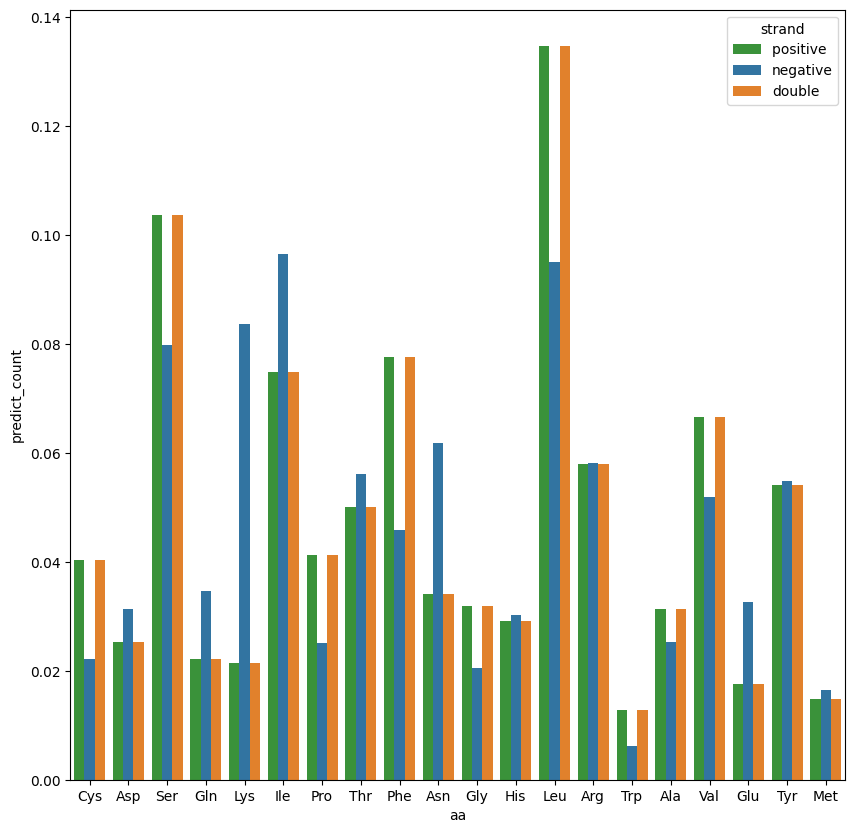

In [4]:
concat = pd.concat([mean_plus_spec_pred, mean_minus_spec_pred, mean_ds_spec_pred])
concat = concat.reset_index(drop=True)
concat = concat.melt(id_vars = 'strand')
concat = concat.rename(columns = {'variable':'aa', 'value':'predict_count'})
d = {'C': 'Cys', 'D': 'Asp', 'S': 'Ser', 'Q': 'Gln', 'K': 'Lys',
     'I': 'Ile', 'P': 'Pro', 'T': 'Thr', 'F': 'Phe', 'N': 'Asn', 
     'G': 'Gly', 'H': 'His', 'L': 'Leu', 'R': 'Arg', 'W': 'Trp', 
     'A': 'Ala', 'V':'Val', 'E': 'Glu', 'Y': 'Tyr', 'M': 'Met'}
palette = {
    'double': 'tab:orange',
    'positive ': 'tab:green',
    'negative' : 'tab:blue'
}
fig = plt.figure(figsize=(10, 10))
order_list = list(d.values())
ax = sns.barplot(x="aa", y='predict_count', hue="strand", data=concat, ax=fig.gca(), palette=palette, order = order_list)
fig.savefig('../figures/predicted_aa_concat.pdf', dpi=300, bbox_inches = 'tight')

In [5]:
#mean_plus_spec_real = pd.read_csv('../data_obtain/mean_aa_real_plus.csv', index_col=0)
#mean_minus_spec_real = pd.read_csv('../data_obtain/mean_aa_real_minus.csv', index_col=0)
#mean_ds_spec_real = pd.read_csv('../data_obtain/mean_aa_real_ds.csv', index_col=0)

In [6]:
viruses_specs = pd.read_csv('../data/ms12syn_all_virus.csv')
viruses_type = pd.read_csv('../data/taxid_virus_type.csv')
viruses_aa_freq = pd.read_csv('../data/aminoacid_freq_all_virus.csv')
viruses_aa_freq_eq = pd.read_csv('../data/aminoacid_eq_freq_all_virus.csv')
d = {'C': 'Cys', 'D': 'Asp', 'S': 'Ser', 'Q': 'Gln', 'K': 'Lys',
     'I': 'Ile', 'P': 'Pro', 'T': 'Thr', 'F': 'Phe', 'N': 'Asn', 
     'G': 'Gly', 'H': 'His', 'L': 'Leu', 'R': 'Arg', 'W': 'Trp', 
     'A': 'Ala', 'V':'Val', 'E': 'Glu', 'Y': 'Tyr', 'M': 'Met'}

viruses_aa_freq.columns = [d[col] if col in d else col for col in viruses_aa_freq.columns]
viruses_type[viruses_type['Type'] == '-']['taxid'].unique()
viruses_aa_freq_eq['taxid'] = viruses_aa_freq_eq['taxid'].apply(str)
viruses_type['taxid'] = viruses_type['taxid'].apply(str)
viruses_specs['taxid'] = viruses_specs['taxid'].apply(str)
viruses_aa_freq['taxid'] = viruses_aa_freq['taxid'].apply(str)
#viruses_specs.loc[viruses_specs['taxid'] == '118655(1933309)','taxid'] = '118655'
#viruses_type.loc[viruses_type['taxid'] == '1933309','taxid'] = '118655'

#viruses_specs.loc[viruses_specs['taxid'] == '54290_1985356','taxid'] = '54290'
#viruses_type.loc[viruses_type['taxid'] == '1985356','taxid'] = '54290'
viruses_type = viruses_type.rename(columns={"taxid": "virus_name", "Type" : "RNAsense"})
viruses_type = viruses_type[['virus_name', "RNAsense"]]
viruses_specs = viruses_specs.rename(columns={"taxid": "virus_name"})
viruses_specs = viruses_specs.merge(viruses_type, how='left', on='virus_name')
#viruses_specs.loc[viruses_specs['virus_name'].isin(['11320_1', '11320_2', '3052493', '1133363', '3052763']), 'RNAsense'] = '-'

viruses_aa_freq = viruses_aa_freq.drop('refseq_id', axis=1)
viruses_aa_freq = viruses_aa_freq.set_index(list(viruses_aa_freq)[0]).stack()
viruses_aa_freq = viruses_aa_freq.reset_index()
viruses_aa_freq = viruses_aa_freq.rename(columns={"taxid": "virus_name", 'level_1':'aa', 0:'count'})
viruses_aa_freq = viruses_aa_freq.merge(viruses_type, how='left', on='virus_name')
#viruses_aa_freq.loc[viruses_aa_freq['virus_name'].isin(['11320', '3052493', '1133363', '3052763', '3052310']), 'RNAsense'] = '-'

In [7]:
viruses_aa_freq_eq.columns = [d[col] if col in d else col for col in viruses_aa_freq_eq.columns]
#viruses_aa_freq_eq = viruses_aa_freq_eq.drop('refseq_id', axis=1)
#viruses_aa_freq_eq = viruses_aa_freq_eq.set_index(list(viruses_aa_freq_eq)[0]).stack()
#viruses_aa_freq_eq = viruses_aa_freq_eq.reset_index()
viruses_aa_freq_eq = viruses_aa_freq_eq.rename(columns={"taxid": "virus_name"})
viruses_aa_freq_eq = viruses_aa_freq_eq.merge(viruses_type, how='left', on='virus_name')

In [8]:
mean_plus_spec_pred = pd.DataFrame(viruses_aa_freq_eq[viruses_aa_freq_eq['RNAsense'] == '+'].drop(['virus_name', 'RNAsense'], axis=1).mean(axis=0)).reset_index().rename(columns={"index": "aa", 0:'predict_count'})
mean_plus_spec_pred['strand'] = 'positive '
mean_minus_spec_pred = pd.DataFrame(viruses_aa_freq_eq[viruses_aa_freq_eq['RNAsense'] == '-'].drop(['virus_name', 'RNAsense'], axis=1).mean(axis=0)).reset_index().rename(columns={"index": "aa", 0:'predict_count'})
mean_minus_spec_pred['strand'] = 'negative'
mean_ds_spec_pred = pd.DataFrame(viruses_aa_freq_eq[viruses_aa_freq_eq['RNAsense'] == 'ds'].drop(['virus_name', 'RNAsense'], axis=1).mean(axis=0)).reset_index().rename(columns={"index": "aa", 0:'predict_count'})
mean_ds_spec_pred['strand'] = 'double'

In [9]:
viruses_aa_freq['Strand'] = ''
viruses_aa_freq = viruses_aa_freq[viruses_aa_freq.aa != 'X']
viruses_aa_freq.loc[viruses_aa_freq['RNAsense'] == 'ds','Strand'] = 'double'
viruses_aa_freq.loc[viruses_aa_freq['RNAsense'] == '+','Strand'] = 'positive '
viruses_aa_freq.loc[viruses_aa_freq['RNAsense'] == '-','Strand'] = 'negative'

In [10]:
mean_plus_spec_real = viruses_aa_freq[viruses_aa_freq['Strand'] == 'positive ']
mean_minus_spec_real = viruses_aa_freq[viruses_aa_freq['Strand'] == 'negative']
mean_ds_spec_real = viruses_aa_freq[viruses_aa_freq['Strand'] == 'double']

In [11]:
#mean_plus_spec_pred = mean_plus_spec_pred.T.reset_index()
#mean_plus_spec_pred = mean_plus_spec_pred.rename(columns={"index": "aa", 0: "predict_count"})

In [12]:
#mean_minus_spec_pred = mean_minus_spec_pred.T.reset_index()
#mean_minus_spec_pred = mean_minus_spec_pred.rename(columns={"index": "aa", 0: "predict_count"})

In [13]:
#mean_ds_spec_pred = mean_ds_spec_pred.T.reset_index()
#mean_ds_spec_pred = mean_ds_spec_pred.rename(columns={"index": "aa", 0: "predict_count"})

In [14]:
plus = mean_plus_spec_real.merge(mean_plus_spec_pred, how='inner', on='aa')
minus = mean_minus_spec_real.merge(mean_minus_spec_pred, how='inner', on='aa')
ds = mean_ds_spec_real.merge(mean_ds_spec_pred, how='inner', on='aa')

In [15]:
plus['pred_to_real'] = plus['predict_count'] / plus['count']
minus['pred_to_real'] = minus['predict_count'] / minus['count']
ds['pred_to_real'] = ds['predict_count'] / ds['count']

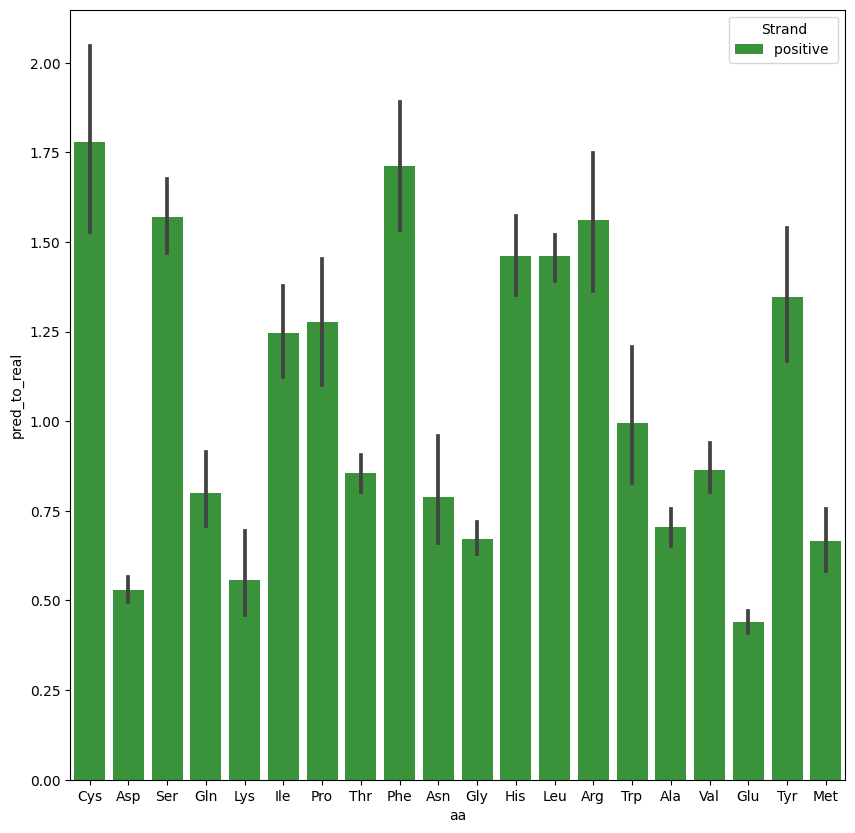

In [16]:
d = {'C': 'Cys', 'D': 'Asp', 'S': 'Ser', 'Q': 'Gln', 'K': 'Lys',
     'I': 'Ile', 'P': 'Pro', 'T': 'Thr', 'F': 'Phe', 'N': 'Asn', 
     'G': 'Gly', 'H': 'His', 'L': 'Leu', 'R': 'Arg', 'W': 'Trp', 
     'A': 'Ala', 'V':'Val', 'E': 'Glu', 'Y': 'Tyr', 'M': 'Met'}
palette = {
    'double': 'tab:orange',
    'positive ': 'tab:green',
    'negative' : 'tab:blue'
}
fig = plt.figure(figsize=(10, 10))
order_list = list(d.values())
ax = sns.barplot(x="aa", y='pred_to_real', hue="Strand", data=plus, ax=fig.gca(), palette=palette, order = order_list)
fig.savefig('../figures/ratio_aa_plus.pdf', dpi=300, bbox_inches = 'tight')

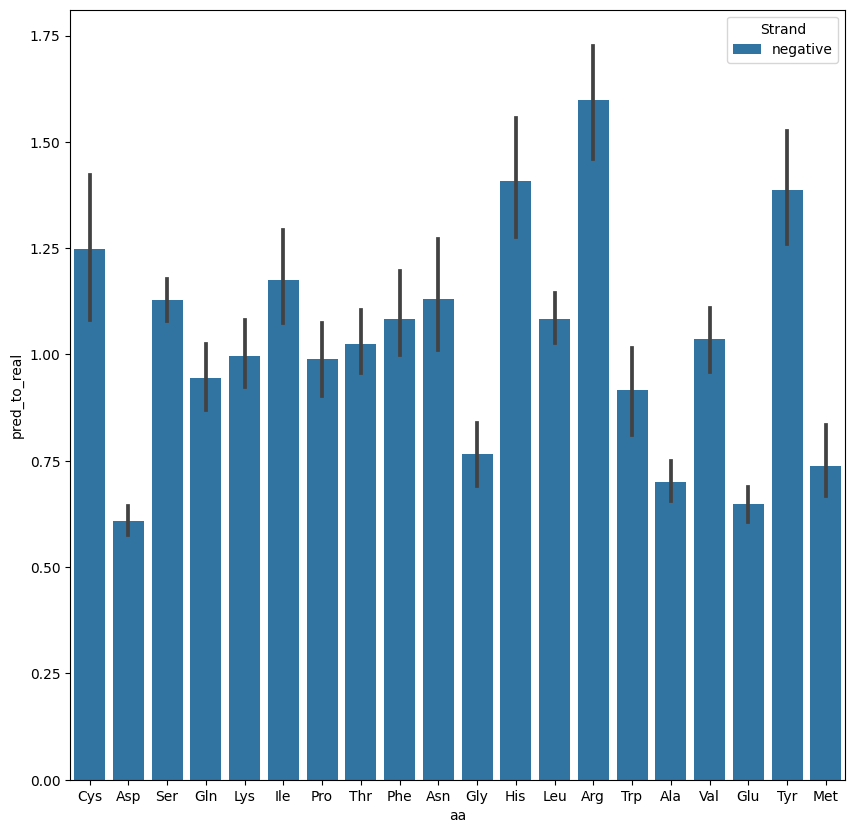

In [17]:
d = {'C': 'Cys', 'D': 'Asp', 'S': 'Ser', 'Q': 'Gln', 'K': 'Lys',
     'I': 'Ile', 'P': 'Pro', 'T': 'Thr', 'F': 'Phe', 'N': 'Asn', 
     'G': 'Gly', 'H': 'His', 'L': 'Leu', 'R': 'Arg', 'W': 'Trp', 
     'A': 'Ala', 'V':'Val', 'E': 'Glu', 'Y': 'Tyr', 'M': 'Met'}
palette = {
    'double': 'tab:orange',
    'positive ': 'tab:green',
    'negative' : 'tab:blue'
}
fig = plt.figure(figsize=(10, 10))
order_list = list(d.values())
ax = sns.barplot(x="aa", y='pred_to_real', hue="Strand", data=minus, ax=fig.gca(), palette=palette, order = order_list)
fig.savefig('../figures/ratio_aa_minus.pdf', dpi=300, bbox_inches = 'tight')

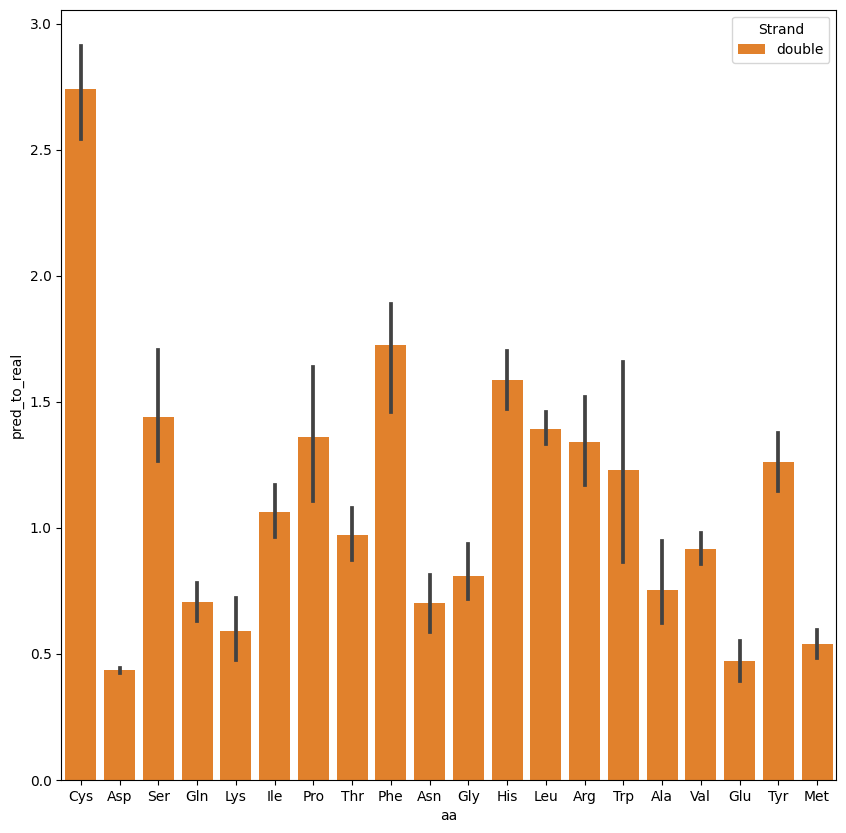

In [18]:
d = {'C': 'Cys', 'D': 'Asp', 'S': 'Ser', 'Q': 'Gln', 'K': 'Lys',
     'I': 'Ile', 'P': 'Pro', 'T': 'Thr', 'F': 'Phe', 'N': 'Asn', 
     'G': 'Gly', 'H': 'His', 'L': 'Leu', 'R': 'Arg', 'W': 'Trp', 
     'A': 'Ala', 'V':'Val', 'E': 'Glu', 'Y': 'Tyr', 'M': 'Met'}
palette = {
    'double': 'tab:orange',
    'positive ': 'tab:green',
    'negative' : 'tab:blue'
}
fig = plt.figure(figsize=(10, 10))
order_list = list(d.values())
ax = sns.barplot(x="aa", y='pred_to_real', hue="Strand", data=ds, ax=fig.gca(), palette=palette, order = order_list)
fig.savefig('../figures/ratio_aa_ds.pdf', dpi=300, bbox_inches = 'tight')

In [19]:
concat = pd.concat([plus, minus, ds])

In [20]:
concat = concat.reset_index(drop=True)

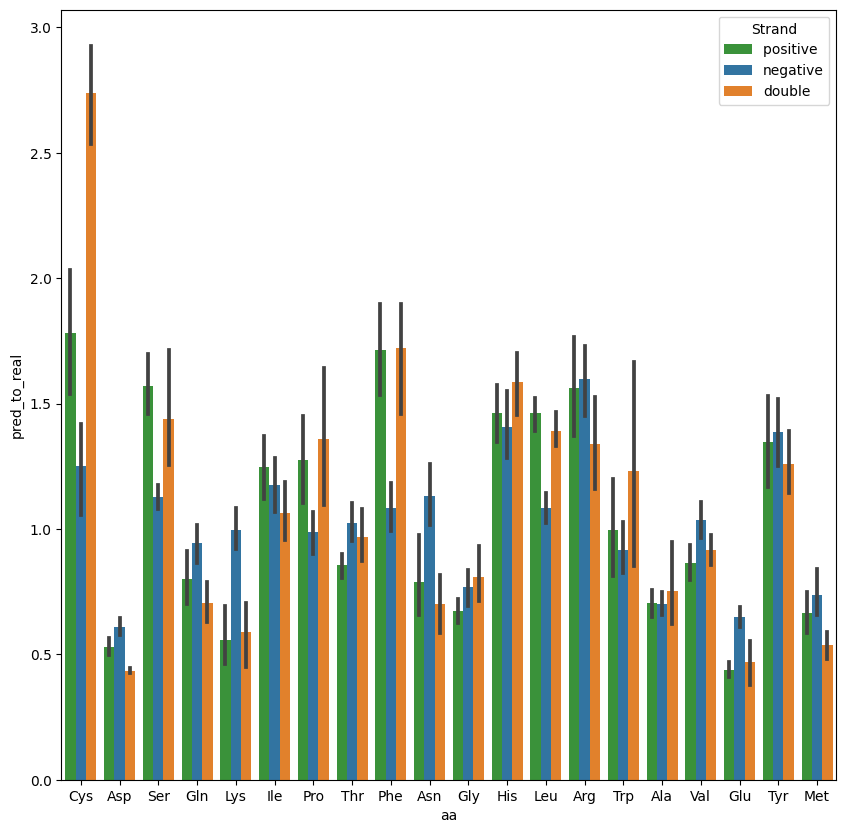

In [21]:
d = {'C': 'Cys', 'D': 'Asp', 'S': 'Ser', 'Q': 'Gln', 'K': 'Lys',
     'I': 'Ile', 'P': 'Pro', 'T': 'Thr', 'F': 'Phe', 'N': 'Asn', 
     'G': 'Gly', 'H': 'His', 'L': 'Leu', 'R': 'Arg', 'W': 'Trp', 
     'A': 'Ala', 'V':'Val', 'E': 'Glu', 'Y': 'Tyr', 'M': 'Met'}
palette = {
    'double': 'tab:orange',
    'positive ': 'tab:green',
    'negative' : 'tab:blue'
}
fig = plt.figure(figsize=(10, 10))
order_list = list(d.values())
ax = sns.barplot(x="aa", y='pred_to_real', hue="Strand", data=concat, ax=fig.gca(), palette=palette, order = order_list)
fig.savefig('../figures/ratio_aa_concat.pdf', dpi=300, bbox_inches = 'tight')

In [22]:
#minus = minus.rename(columns={"count": "count_minus", 'predict_count': "predict_count_minus"})
plus_merge = plus[['aa', 'count', 'Strand', 'predict_count', 'pred_to_real']]
plus_merge = pd.pivot_table(plus_merge, values=['count', 'pred_to_real'], index=['aa', 'Strand', 'predict_count'], aggfunc="mean").reset_index()
minus_merge = minus[['aa', 'count', 'Strand', 'predict_count', 'pred_to_real']]
minus_merge = pd.pivot_table(minus_merge, values=['count', 'pred_to_real'], index=['aa', 'Strand', 'predict_count'], aggfunc="mean").reset_index()
plus_minus = plus_merge.merge(minus_merge, how='inner', on='aa')

In [23]:
plus_minus['count_dif'] = plus_minus['count_x'] - plus_minus['count_y']
plus_minus['count_predict_dif'] = plus_minus['predict_count_x'] - plus_minus['predict_count_y']

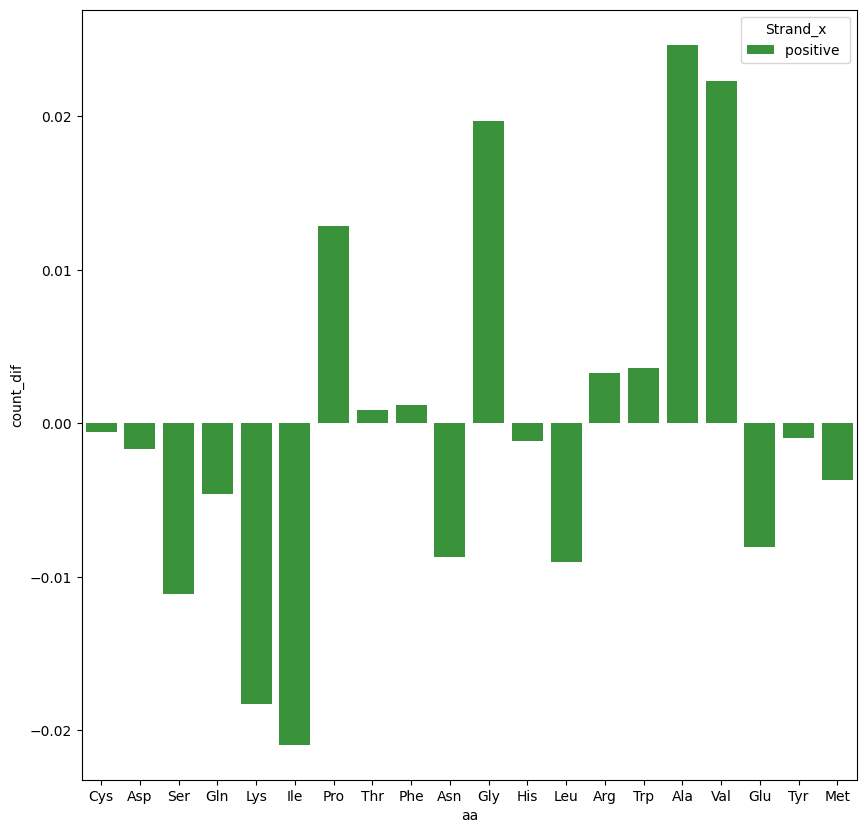

In [24]:
d = {'C': 'Cys', 'D': 'Asp', 'S': 'Ser', 'Q': 'Gln', 'K': 'Lys',
     'I': 'Ile', 'P': 'Pro', 'T': 'Thr', 'F': 'Phe', 'N': 'Asn', 
     'G': 'Gly', 'H': 'His', 'L': 'Leu', 'R': 'Arg', 'W': 'Trp', 
     'A': 'Ala', 'V':'Val', 'E': 'Glu', 'Y': 'Tyr', 'M': 'Met'}
palette = {
    'double': 'tab:orange',
    'positive ': 'tab:green',
    'negative' : 'tab:blue'
}
fig = plt.figure(figsize=(10, 10))
order_list = list(d.values())
ax = sns.barplot(x="aa", y='count_dif', hue="Strand_x", data=plus_minus, ax=fig.gca(), palette=palette, order = order_list)
fig.savefig('../figures/count_dif_real.pdf', dpi=300, bbox_inches = 'tight')

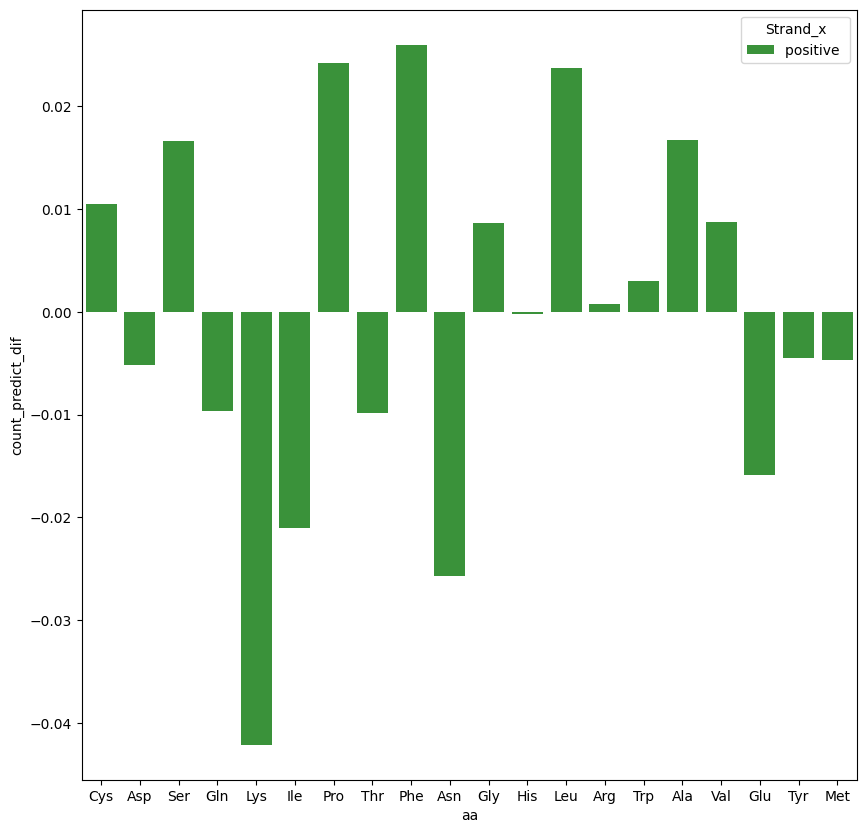

In [25]:
d = {'C': 'Cys', 'D': 'Asp', 'S': 'Ser', 'Q': 'Gln', 'K': 'Lys',
     'I': 'Ile', 'P': 'Pro', 'T': 'Thr', 'F': 'Phe', 'N': 'Asn', 
     'G': 'Gly', 'H': 'His', 'L': 'Leu', 'R': 'Arg', 'W': 'Trp', 
     'A': 'Ala', 'V':'Val', 'E': 'Glu', 'Y': 'Tyr', 'M': 'Met'}
palette = {
    'double': 'tab:orange',
    'positive ': 'tab:green',
    'negative' : 'tab:blue'
}
fig = plt.figure(figsize=(10, 10))
order_list = list(d.values())
ax = sns.barplot(x="aa", y='count_predict_dif', hue="Strand_x", data=plus_minus, ax=fig.gca(), palette=palette, order = order_list)
fig.savefig('../figures/count_dif_predict.pdf', dpi=300, bbox_inches = 'tight')

In [26]:
viruses_aa_freq_nooutlier = viruses_aa_freq[~viruses_aa_freq['virus_name'].isin(['693997', '10990', '28295', '694014'])]

In [27]:
viruses_aa_freq_eq_nooutlier = viruses_aa_freq_eq[~viruses_aa_freq_eq['virus_name'].isin(['693997', '10990', '28295', '694014'])]

In [28]:
mean_plus_spec_pred = pd.DataFrame(viruses_aa_freq_eq_nooutlier[viruses_aa_freq_eq_nooutlier['RNAsense'] == '+'].drop(['virus_name', 'RNAsense'], axis=1).mean(axis=0)).reset_index().rename(columns={"index": "aa", 0:'predict_count'})
mean_plus_spec_pred['strand'] = 'positive '
mean_minus_spec_pred = pd.DataFrame(viruses_aa_freq_eq_nooutlier[viruses_aa_freq_eq_nooutlier['RNAsense'] == '-'].drop(['virus_name', 'RNAsense'], axis=1).mean(axis=0)).reset_index().rename(columns={"index": "aa", 0:'predict_count'})
mean_minus_spec_pred['strand'] = 'negative'
mean_ds_spec_pred = pd.DataFrame(viruses_aa_freq_eq_nooutlier[viruses_aa_freq_eq_nooutlier['RNAsense'] == 'ds'].drop(['virus_name', 'RNAsense'], axis=1).mean(axis=0)).reset_index().rename(columns={"index": "aa", 0:'predict_count'})
mean_ds_spec_pred['strand'] = 'double'
mean_plus_spec_real = viruses_aa_freq_nooutlier[viruses_aa_freq_nooutlier['Strand'] == 'positive ']
mean_minus_spec_real = viruses_aa_freq_nooutlier[viruses_aa_freq_nooutlier['Strand'] == 'negative']
mean_ds_spec_real = viruses_aa_freq_nooutlier[viruses_aa_freq_nooutlier['Strand'] == 'double']
plus = mean_plus_spec_real.merge(mean_plus_spec_pred, how='inner', on='aa')
minus = mean_minus_spec_real.merge(mean_minus_spec_pred, how='inner', on='aa')
ds = mean_ds_spec_real.merge(mean_ds_spec_pred, how='inner', on='aa')
plus['pred_to_real'] = plus['predict_count'] / plus['count']
minus['pred_to_real'] = minus['predict_count'] / minus['count']
ds['pred_to_real'] = ds['predict_count'] / ds['count']
plus_merge = plus[['aa', 'count', 'Strand', 'predict_count', 'pred_to_real']]
plus_merge = pd.pivot_table(plus_merge, values=['count', 'pred_to_real'], index=['aa', 'Strand', 'predict_count'], aggfunc="mean").reset_index()
minus_merge = minus[['aa', 'count', 'Strand', 'predict_count', 'pred_to_real']]
minus_merge = pd.pivot_table(minus_merge, values=['count', 'pred_to_real'], index=['aa', 'Strand', 'predict_count'], aggfunc="mean").reset_index()
plus_minus_no_out = plus_merge.merge(minus_merge, how='inner', on='aa')
plus_minus_no_out['count_dif'] = plus_minus_no_out['count_x'] - plus_minus_no_out['count_y']
plus_minus_no_out['count_predict_dif'] = plus_minus_no_out['predict_count_x'] - plus_minus_no_out['predict_count_y']

In [29]:
plus_minus

,aa,Strand_x,predict_count_x,count_x,pred_to_real_x,Strand_y,predict_count_y,count_y,pred_to_real_y,count_dif,count_predict_dif
0,Ala,positive,0.052739,0.076897,0.704033,negative,0.036076,0.052226,0.701105,0.024671,0.016663
1,Arg,positive,0.074829,0.050936,1.561858,negative,0.074030,0.047653,1.598444,0.003283,0.000799
2,Asn,positive,0.031141,0.043457,0.789441,negative,0.056852,0.052161,1.129692,-0.008704,-0.025711
3,Asp,positive,0.026709,0.051234,0.529398,negative,0.031871,0.052892,0.608506,-0.001658,-0.005162
4,Cys,positive,0.038024,0.023240,1.779501,negative,0.027557,0.023809,1.249078,-0.000569,0.010467
5,Gln,positive,0.024574,0.032478,0.800608,negative,0.034195,0.037105,0.944909,-0.004627,-0.009621
6,Glu,positive,0.022090,0.051308,0.439481,negative,0.037954,0.059350,0.648439,-0.008042,-0.015864
7,Gly,positive,0.046819,0.071063,0.672256,negative,0.038219,0.051351,0.767087,0.019712,0.008600
8,His,positive,0.030987,0.021706,1.461641,negative,0.031243,0.022849,1.408037,-0.001143,-0.000256
9,Ile,positive,0.062314,0.052028,1.246075,negative,0.083361,0.072958,1.174378,-0.020930,-0.021046


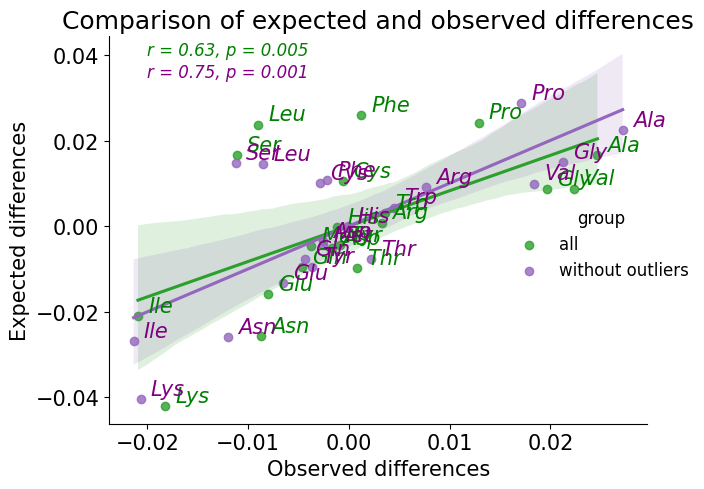

In [40]:
plus_minus['count_predict_dif'] = plus_minus['count_predict_dif'].astype(np.float64)
plus_minus['group'] = 'all'
plus_minus_no_out['count_predict_dif'] = plus_minus_no_out['count_predict_dif'].astype(np.float64)
plus_minus_no_out['group'] = 'without outliers'

concat = pd.concat([plus_minus, plus_minus_no_out])
#g = sns.JointGrid(data=plus_minus, x='count_dif', y='count_predict_dif')
#g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
#g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
#plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['legend.title_fontsize'] = 'large'
palette = {
    'all': 'tab:green',
    'without outliers': 'tab:purple'
}
sns.lmplot(x = "count_dif", y = "count_predict_dif",
           hue = "group", data = concat, palette = palette)
#g.ax_joint.text(-0.02, 0.05, 'r = 0.45, p = 0.0023', fontstyle='italic')
plt.text(x=-0.02, y=0.04, s='r = 0.63, p = 0.005', fontsize=12, color='green' , fontstyle='italic')
plt.text(x=-0.02, y=0.035, s='r = 0.75, p = 0.001', fontsize=12, color='purple' , fontstyle='italic')

for x, y, text, group in zip(concat['count_dif'], concat['count_predict_dif'], concat['aa'], concat['group'] ):
    if group == 'all':
        color = 'green'
    else:
        color = 'purple'
    plt.text(x=x+0.001, y=y+0.001, s=text, fontstyle='italic', fontsize=15, color=color)
    
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Observed differences',fontsize=15)
plt.ylabel('Expected differences',fontsize=15)
plt.title('Comparison of expected and observed differences',fontsize=18)
plt.tight_layout()
plt.savefig('../figures/corr_real_predict.pdf', dpi=300, bbox_inches = 'tight')

In [31]:
#pg.corr(x=plus_minus['count_dif'], y=plus_minus['count_predict_dif'])
from scipy import stats
print(stats.spearmanr(plus_minus['count_dif'], plus_minus['count_predict_dif'], alternative='greater'))
print(stats.spearmanr(plus_minus_no_out['count_dif'], plus_minus_no_out['count_predict_dif'], alternative='greater'))

SignificanceResult(statistic=0.5518796992481202, pvalue=0.0058211866835428784)
SignificanceResult(statistic=0.6330827067669172, pvalue=0.0013668934395256694)


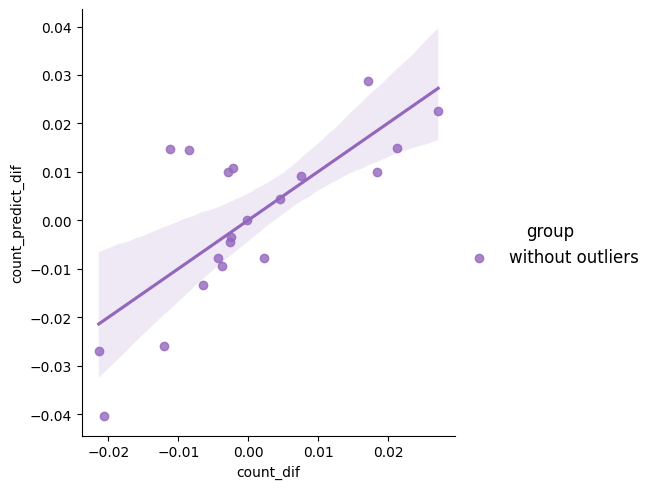

In [32]:
sns.lmplot(x = "count_dif", y = "count_predict_dif",
           hue = "group", data = plus_minus_no_out, palette = palette)

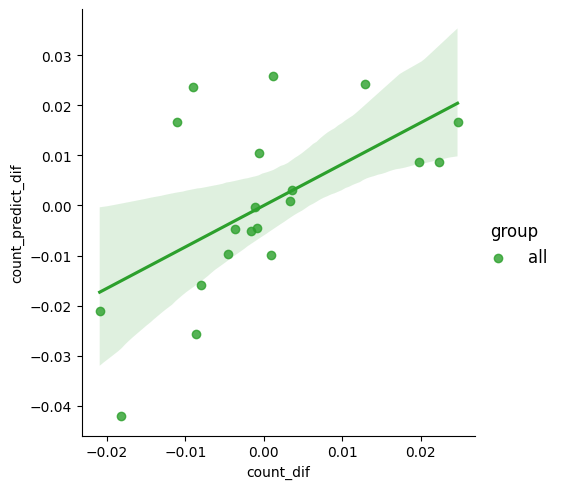

In [33]:
sns.lmplot(x = "count_dif", y = "count_predict_dif",
           hue = "group", data = plus_minus, palette = palette)

In [34]:
plus_minus_no_out

,aa,Strand_x,predict_count_x,count_x,pred_to_real_x,Strand_y,predict_count_y,count_y,pred_to_real_y,count_dif,count_predict_dif,group
0,Ala,positive,0.058535,0.079399,0.757908,negative,0.036076,0.052226,0.701105,0.027173,0.022458,without outliers
1,Arg,positive,0.083132,0.055267,1.548935,negative,0.074030,0.047653,1.598444,0.007614,0.009102,without outliers
2,Asn,positive,0.030838,0.040172,0.840498,negative,0.056852,0.052161,1.129692,-0.011989,-0.026015,without outliers
3,Asp,positive,0.028323,0.050370,0.572236,negative,0.031871,0.052892,0.608506,-0.002522,-0.003548,without outliers
4,Cys,positive,0.037574,0.020910,1.909493,negative,0.027557,0.023809,1.249078,-0.002899,0.010017,without outliers
5,Gln,positive,0.026493,0.032771,0.865473,negative,0.034195,0.037105,0.944909,-0.004334,-0.007701,without outliers
6,Glu,positive,0.024598,0.052849,0.474146,negative,0.037954,0.059350,0.648439,-0.006502,-0.013356,without outliers
7,Gly,positive,0.053234,0.072593,0.750113,negative,0.038219,0.051351,0.767087,0.021242,0.015015,without outliers
8,His,positive,0.031228,0.022715,1.397228,negative,0.031243,0.022849,1.408037,-0.000134,-0.000016,without outliers
9,Ile,positive,0.056407,0.051593,1.145798,negative,0.083361,0.072958,1.174378,-0.021364,-0.026954,without outliers


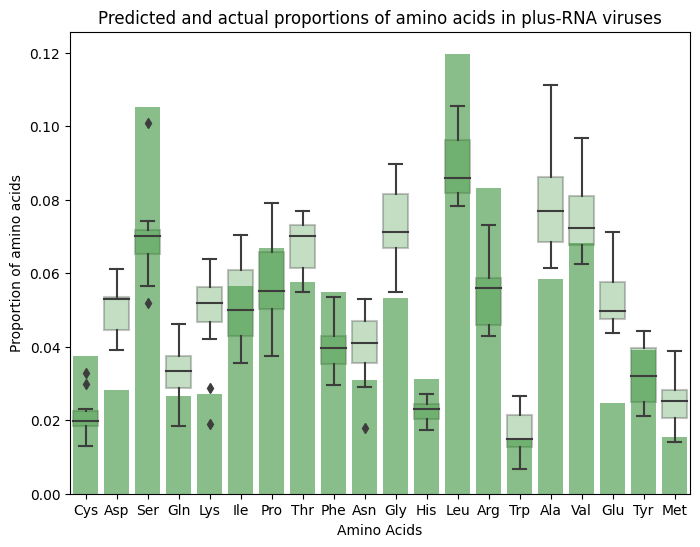

In [35]:
palette = {
    'double': 'tab:orange',
    'positive ': 'tab:green',
    'negative' : 'tab:blue'
}
plt.figure(figsize=(8,6))
sns.boxplot(x="aa",
                y="count",
                data=plus, hue="Strand", palette=palette, order = order_list, boxprops=dict(alpha=.3))
sns.barplot(x="aa", y='predict_count', data=plus, hue="Strand", palette=palette, order = order_list, alpha=0.6)
plt.xlabel("Amino Acids")
plt.ylabel("Proportion of amino acids")
plt.title('Predicted and actual proportions of amino acids in plus-RNA viruses')
plt.legend('',frameon=False)
plt.savefig('../figures/real_predict_positive.pdf', dpi=300, bbox_inches = 'tight')
plt.show()
plt.close()

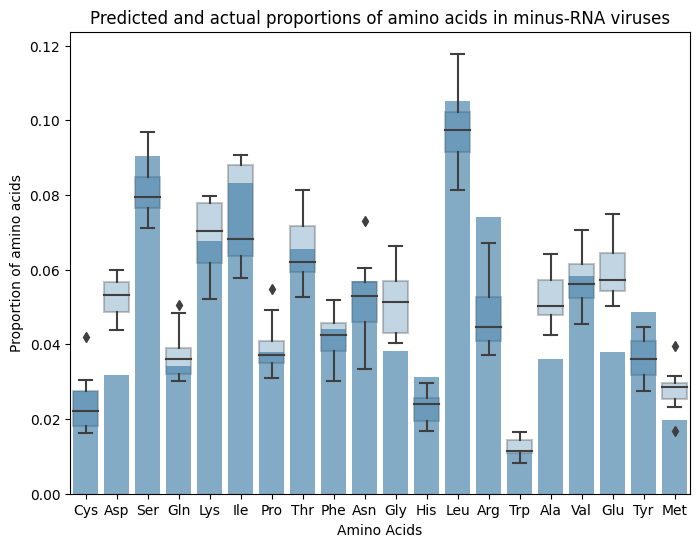

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(x="aa",
                y="count",
                data=minus, hue="Strand", palette=palette, order = order_list, boxprops=dict(alpha=.3))
sns.barplot(x="aa", y='predict_count', data=minus, hue="Strand", palette=palette, order = order_list, alpha=0.6)
plt.xlabel("Amino Acids")
plt.ylabel("Proportion of amino acids")
plt.title('Predicted and actual proportions of amino acids in minus-RNA viruses')
plt.legend('',frameon=False)
plt.savefig('../figures/real_predict_negative.pdf', dpi=300, bbox_inches = 'tight')
plt.show()
plt.close()

In [37]:
concat = pd.concat([plus, minus])

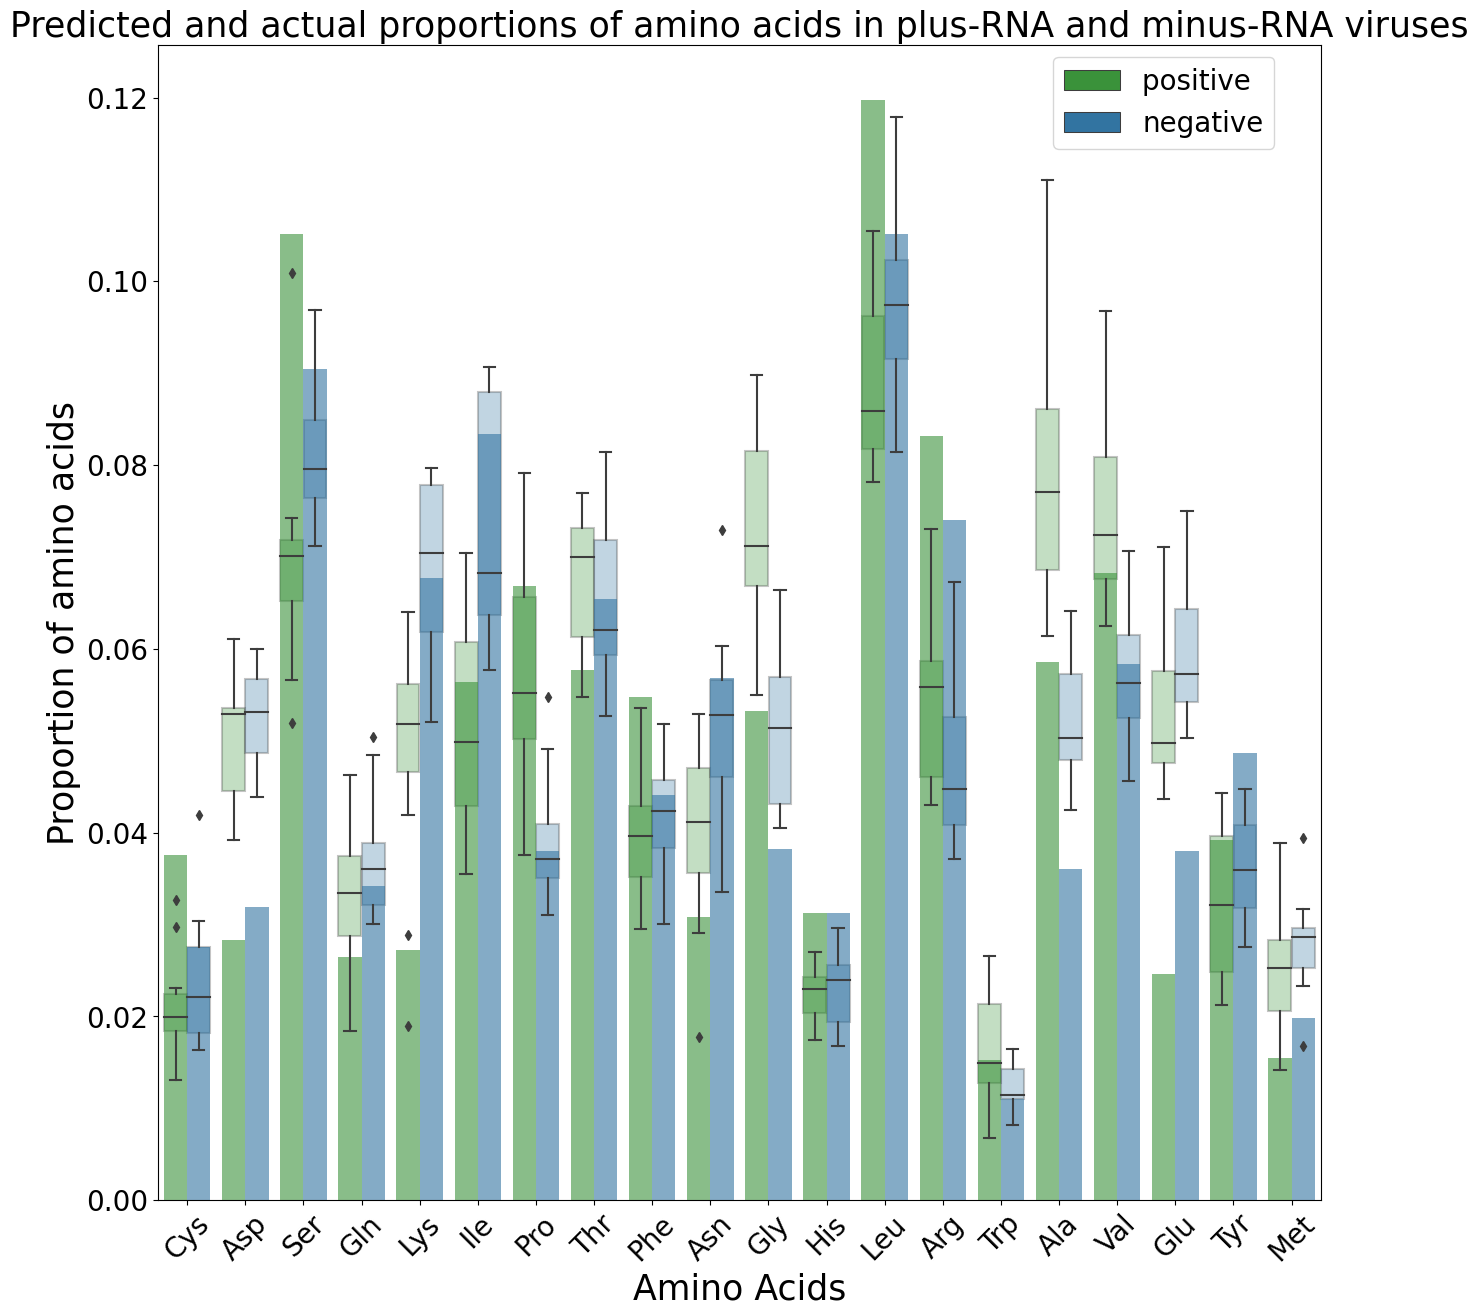

In [38]:
plt.figure(figsize=(15,15))
sns.boxplot(x="aa",
                y="count",
                data=concat, hue="Strand", palette=palette, order = order_list, boxprops=dict(alpha=.3))

ax = sns.barplot(x="aa", y='predict_count', data=concat, hue="Strand", palette=palette, order = order_list, alpha=0.6)
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(0.77, 0.99), loc=2, borderaxespad=0.,fontsize=20)
plt.xlabel("Amino Acids",fontsize=25)
plt.ylabel("Proportion of amino acids",fontsize=25)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.title('Predicted and actual proportions of amino acids in plus-RNA and minus-RNA viruses',fontsize=25)
#plt.legend('',frameon=False)
plt.savefig('../figures/real_predict_pos_neg.pdf', dpi=300, bbox_inches = 'tight')
plt.show()
plt.close()